In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.io

plt.rcParams['figure.figsize'] = [15,7.5]

In [2]:
data = scipy.io.loadmat('./YaleFaceDataBase/Yale_64x64.mat')

In [73]:
X_test = np.array(data['fea'])[150:,:]

In [43]:
X = np.array(data['fea'])[:150,:]

In [44]:
XtX = X.T.dot(X)

In [45]:
eigValues, eigVectors = np.linalg.eig(XtX)

In [46]:
eigValues = eigValues.flatten()

In [47]:
print(eigValues[3046:4000])

[ 1803.12389601  1899.57179202  1918.84142017 -1943.73262028
 -1944.68226928 -1943.08703725  1913.31099872 -1766.06015306
 -1769.76889747 -1923.09719359 -1927.88513511 -1928.5587667
 -1932.98239183 -1934.955797    1887.95533997  1814.88989924
  1818.50356241  1861.78984627  1856.63843902  1854.15640732
  1825.5667578  -1913.69313769 -1911.79037025 -1778.40011411
  1847.17660197  1844.04646401  1824.01226103  1871.37722993
  1866.28293739 -1905.36281753 -1902.72878736 -1885.01217047
 -1894.65981215 -1891.73460518 -1912.75807287 -1781.97791191
 -1784.74089416 -1790.20636858 -1791.76917791 -1907.7841391
 -1857.8932775  -1851.13448327 -1875.65783656 -1864.30157501
 -1864.80137156  1884.12441987  1877.63724073 -1849.25310647
 -1898.29936558 -1835.89698976 -1879.29316538 -1799.44325447
 -1795.78667969 -1808.26142923 -1802.80332421 -1806.20813853
 -1825.09962476 -1820.5901364  -1844.09659329 -1845.83110751
  1820.81994232  1906.03043416  1836.8646269   1867.84189194
  1836.03292303  1882.2537

In [48]:
idx = eigValues.argsort()[::-1]   
eigValues = eigValues[idx]
eigVectors = eigVectors[:,idx]

In [49]:
r = 0
count = 0
while(r<len(eigValues)):
        if eigValues[r] < 1 and eigValues[r]>-1:
            count += 1    
        r += 1

In [50]:
print(r)
print(count)

4096
0


In [51]:
r = len(eigValues)-count

In [52]:
eigVals = eigValues[:r]
D = np.diag(abs(eigVals)**(1/2))

In [53]:
Vt = eigVectors[:,:r].T

In [54]:
print(Vt.shape)

(4096, 4096)


In [55]:
Xcap = (X.dot(Vt.T)).dot(Vt)

In [56]:
print(Xcap.shape)

(150, 4096)


[]

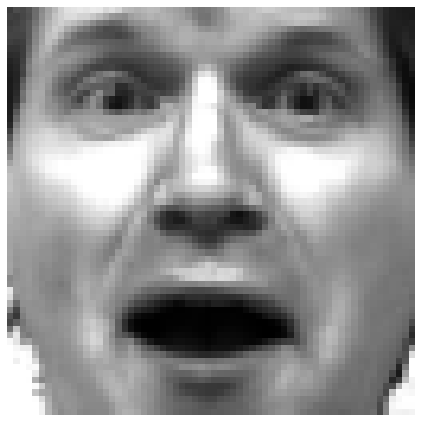

In [57]:
img = plt.imshow(Xcap[1,:].reshape(64,64).T)
img.set_cmap('gray')
plt.axis('off')
plt.plot()

In [58]:
invD = np.linalg.inv(D)

In [59]:
print(invD)

[[0.00138379 0.         0.         ... 0.         0.         0.        ]
 [0.         0.01029167 0.         ... 0.         0.         0.        ]
 [0.         0.         0.01031231 ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 0.01033099 0.         0.        ]
 [0.         0.         0.         ... 0.         0.01032504 0.        ]
 [0.         0.         0.         ... 0.         0.         0.01030504]]


In [60]:
invD_Vt_Xt = np.matmul(np.matmul(invD,Vt),X.T)

In [72]:
print(X.shape)

(150, 4096)


In [74]:
x = X_test
print(x.shape)

(15, 4096)


In [75]:
print(x.shape)

(15, 4096)


In [76]:
print(invD_Vt_Xt.shape)

(4096, 150)


In [77]:
y = np.matmul(invD_Vt_Xt,x)

ValueError: matmul: Input operand 1 has a mismatch in its core dimension 0, with gufunc signature (n?,k),(k,m?)->(n?,m?) (size 15 is different from 150)

In [65]:
print(y.shape)

(4096, 4096)


In [87]:
# xcap = XV(Σ^−2)VtXtx.
H = np.matmul(np.matmul(np.matmul(np.matmul(X,Vt.T),np.matmul(invD,invD)),Vt),X.T)

In [88]:
print(H.shape)
print(x.shape)

xcap = np.matmul(H[:,:15],x)

(150, 150)
(15, 4096)


In [89]:
print(xcap.shape)

(150, 4096)


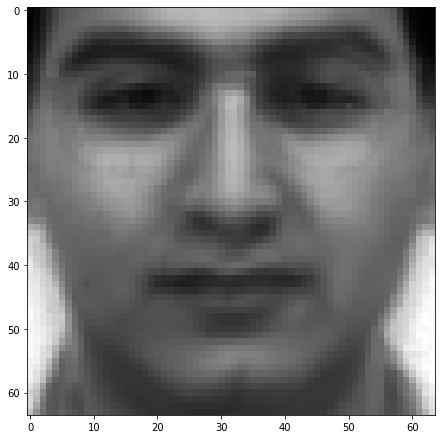

In [92]:
img = plt.imshow(xcap[9,:].reshape(64,64).T)
img.set_cmap('gray')